In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df0 = pd.read_csv("customer_shopping_data.csv")



In [26]:
df1 = df0.copy()

In [27]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [28]:
# convertir el
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], dayfirst=True )

In [29]:
df1['invoice_date'].head(2)

0   2022-08-05
1   2021-12-12
Name: invoice_date, dtype: datetime64[ns]

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [31]:
# agregar columnas para anuales
df1['year'] = df1['invoice_date'].dt.strftime('%Y')

In [32]:
df1['month'] = df1['invoice_date'].dt.month

In [33]:
df1['month'].head()

0     8
1    12
2    11
3     5
4    10
Name: month, dtype: int32

In [34]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


# relacion de genero y numero de transacciones

[Text(0.5, 1.0, 'relacion de genero y numero de transacciones')]

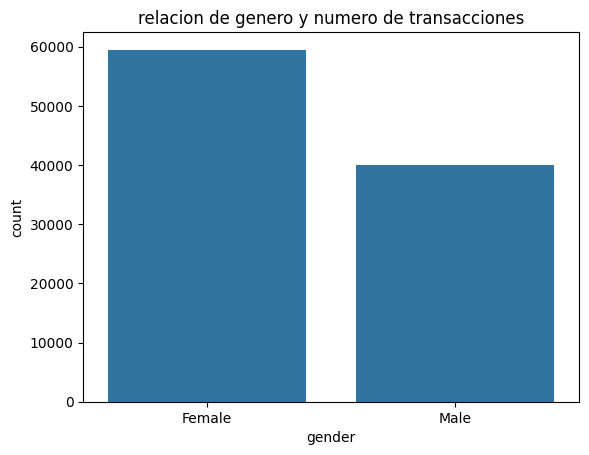

In [35]:
sns.countplot(data=df1, x='gender').set(title='relacion de genero y numero de transacciones')

In [41]:
# cantitad de elementos por categoria
gender_quantity = df1['gender'].value_counts()
print(gender_quantity)

gender
Female    59482
Male      39975
Name: count, dtype: int64


Text(0.5, 1.0, 'relacion de transacciones entre hombres y mujeres')

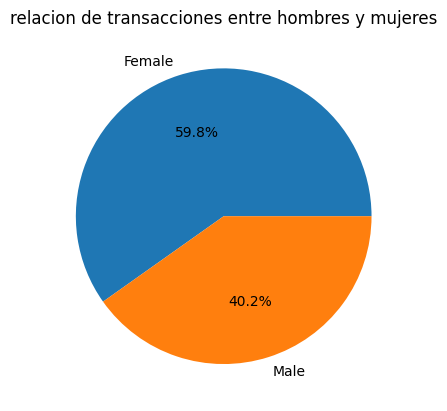

In [42]:
# histograma
plt.pie(gender_quantity, labels=gender_quantity.index, autopct='%1.1f%%')
plt.title('relacion de transacciones entre hombres y mujeres')

# Distribucion de edades por numero de transacciones